## 필요 툴&라이브러리 설치

In [1]:
!pip install --upgrade pip
!pip install torch
!pip install torchvision
!pip install numpy
!pip install matplotlib
!pip install opencv-python


## import & 버전 확인

In [1]:
!python --version
!nvidia-smi
import torch
import torch.nn.functional as F
import numpy as np
import torchvision
from matplotlib import pyplot as plt
import time
print(torch.__version__)
print(np.__version__)
print(torchvision.__version__)


Python 3.8.8
zsh:1: command not found: nvidia-smi
1.11.0
1.20.1
0.12.0


## inference

In [75]:

class ModelV3(torch.nn.Module):
    def __init__(self):
        super(ModelV3, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = torch.nn.Dropout(0.25)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(9216, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

class inference_model:
    def __init__(self):
        self.model = torch.load('../model.pt')
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        #self.imgs = np.load('../mnist_inputs.npy')

    def inference(self, img):
        self.model = self.model.to(self.device)
        
        img = torch.from_numpy(img).float() # torch.tensor(random).float() ? 뭔 차이? 둘다 type은 tenser
        img = img.to(self.device)

        self.model.eval()    #nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
        with torch.no_grad():
            out = self.model(img)
            label_idx = torch.argmax(out, dim=1)
        return label_idx
    
"""
MNIST의 test data 중에서 0부터 9까지 각 1장씩, 총 10장을 랜덤으로 추출해서 
[10, 28, 28]의 shape로 묶어서 numpy.array 형태로 저장해둔 파일
len(imgdata) = 10, len(imgdata[0]) = 28
"""

# print(imgdata[1].shape) (28,28) 

imgdata = np.load('../mnist_inputs.npy')

for i in range(len(imgdata)):
    testimg = np.expand_dims(imgdata[i], axis=(0,1)) # (28,28) -> (1, 1, 28, 28) 튜플을 사용해서 차원 한꺼번에 추가
    #print(testimg.shape)
    infer = inference_model()
    rst = infer.inference(testimg).item()
    print(rst)


0
1
2
3
4
5
6
7
8
9


## inference 2
- img 입력을 init 에서 & 결과 출력하는 함수를 inference model class의 메소드로

In [3]:

class ModelV3(torch.nn.Module):
    def __init__(self):
        super(ModelV3, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = torch.nn.Dropout(0.25)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(9216, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

class inference_model:
    def __init__(self):
        self.model = torch.load('../model.pt')
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.imgs = np.load('../mnist_inputs.npy')
    
    def printInference(self):
        for i in range(len(self.imgs)):
            testimg = np.expand_dims(imgdata[i], axis=(0,1))
            rst = self.inference(testimg)
            print(rst.item())
        return

    def inference(self,img):
        self.model = self.model.to(self.device)
        
        img = torch.from_numpy(img).float()
        img = img.to(self.device)

        self.model.eval()    
        with torch.no_grad():
            out = self.model(img)
            label_idx = torch.argmax(out, dim=1)
        return label_idx
    

infer = inference_model()
infer.printInference()


0
1
2
3
4
5
6
7
8
9


7


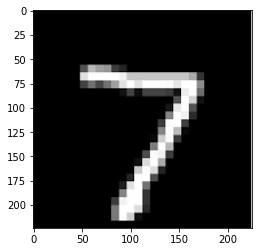

In [126]:
import cv2

class ModelV3(torch.nn.Module):
    def __init__(self):
        super(ModelV3, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 32, 3, 1)
        self.conv2 = torch.nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = torch.nn.Dropout(0.25)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc1 = torch.nn.Linear(9216, 128)
        self.fc2 = torch.nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

class inference_model:
    def __init__(self, img):
        self.model = torch.load('../model.pt')
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.img = self.resize_img(img)

    def inference(self):
        self.model = self.model.to(self.device)
        
        #print(self.img)
        
        self.img = torch.from_numpy(self.img).float() # torch.tensor(random).float() ? 뭔 차이? 둘다 type은 tensor
        self.img = self.img.to(self.device)

        self.model.eval()    #nn.Module에서 train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수
        with torch.no_grad():
            out = self.model(self.img)
            label_idx = torch.argmax(out, dim=1)
            mnist_rst = label_idx.item()
        return mnist_rst
    
    def resize_img(self, img):
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resize_img = cv2.resize(gray_image, dsize=(28, 28), interpolation=cv2.INTER_CUBIC) #interpolation = 보간법
        resize_img = torch.from_numpy(resize_img).float()
        test_img = np.expand_dims(resize_img, axis=(0,1))
        
        return test_img

    
img = cv2.imread('seven.png')
plt.imshow(img)

infer = inference_model(img)
mnist_rst = infer.inference()

print(mnist_rst)

